In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [4]:
kaggle_credentials = json.load(open('kaggle.json'))

In [5]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [7]:
!kaggle datasets download -d spscientist/students-performance-in-exams

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
from zipfile import ZipFile
with ZipFile('/content/students-performance-in-exams.zip', 'r') as zipObj:
   zipObj.extractall()

In [9]:
!ls


kaggle.json  StudentsPerformance.csv
sample_data  students-performance-in-exams.zip


In [10]:
df = pd.read_csv('StudentsPerformance.csv')

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [14]:
df.select_dtypes('int').columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

students overall performace based on the ethnicity

In [15]:
grouped_ethnicity = df.groupby('race/ethnicity')[['math score','reading score','writing score']].mean()
print(grouped_ethnicity)

                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


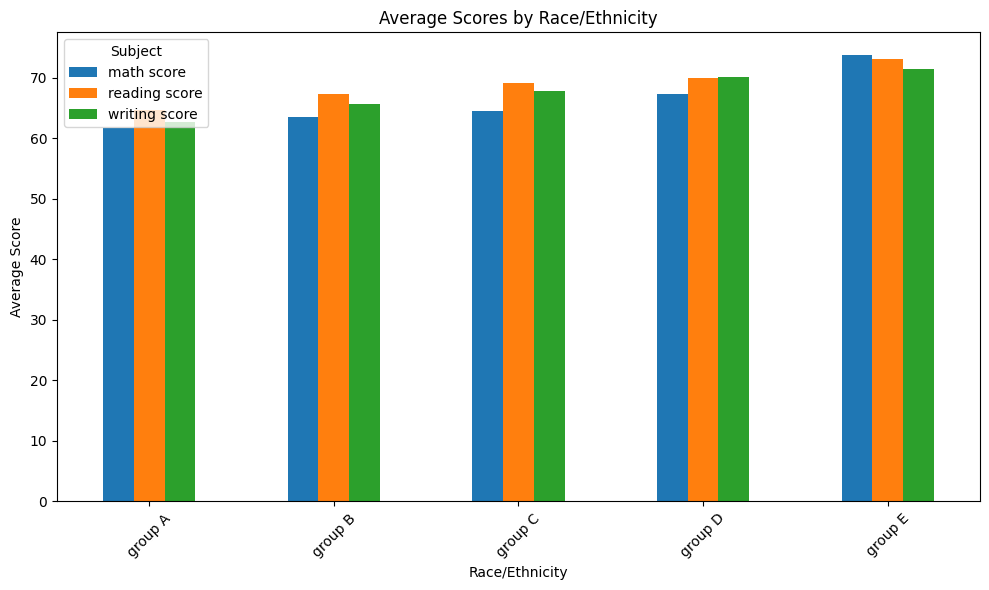

In [16]:
grouped_ethnicity.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Race/Ethnicity')
plt.ylabel('Average Score')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)
plt.legend(title='Subject')
plt.tight_layout()
plt.show()

In [17]:
grouped_genders = df.groupby('gender')[['math score','reading score','writing score']].mean()
print(grouped_genders)

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


Plotting the Average scores of students based on their genders.

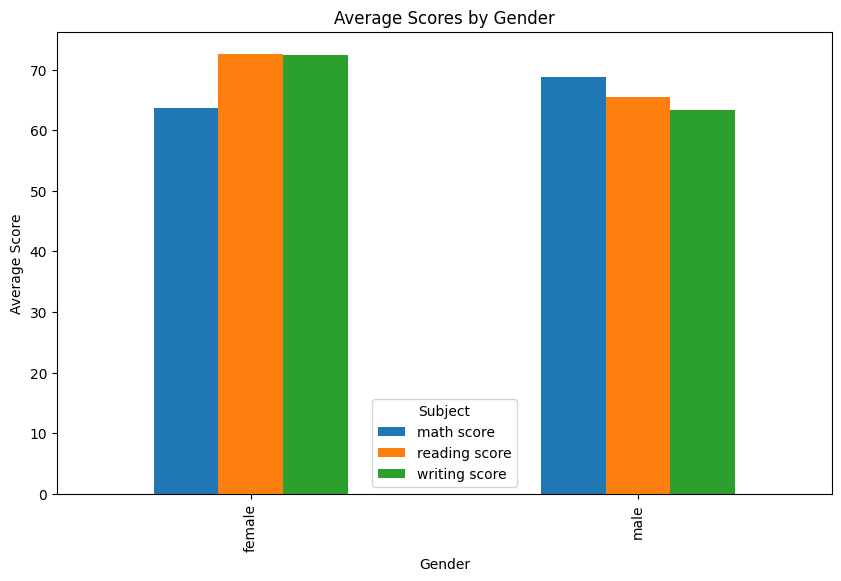

In [18]:
grouped_genders.plot(kind = 'bar', figsize=(10,6))
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.legend(title='Subject')

In [19]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

Let us see how the marks are distributed

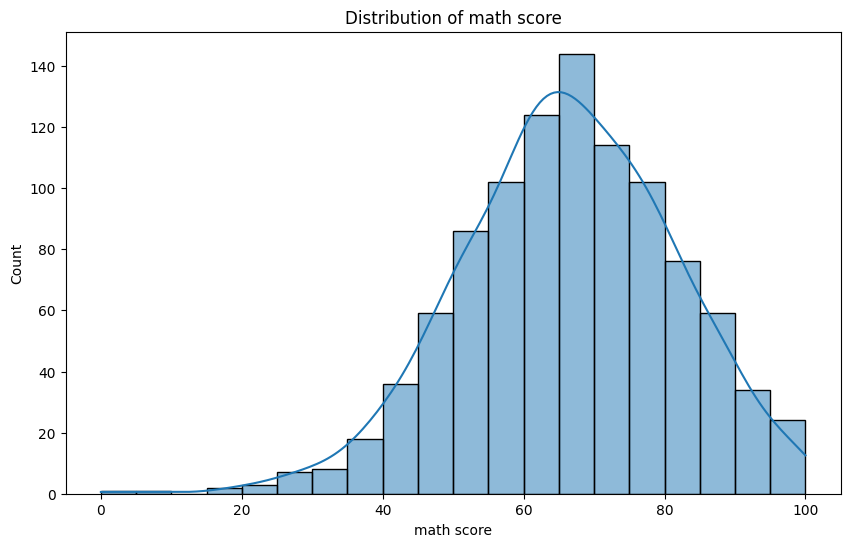

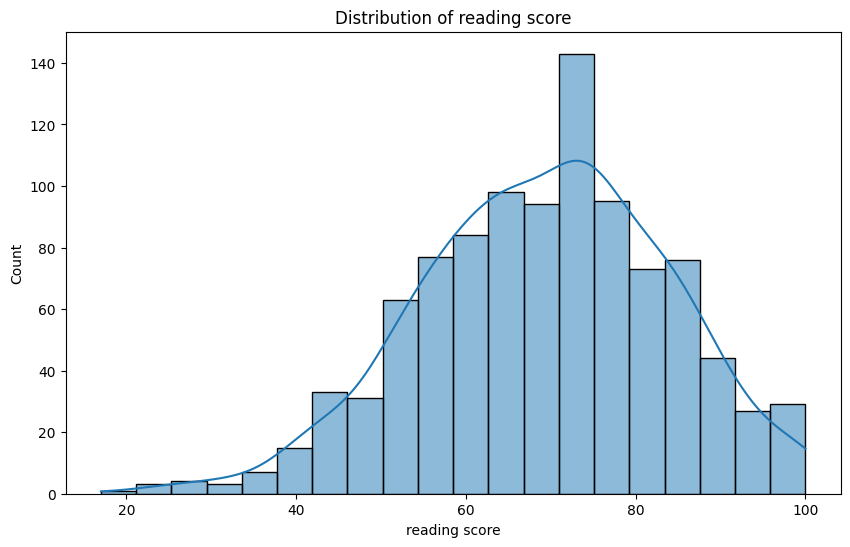

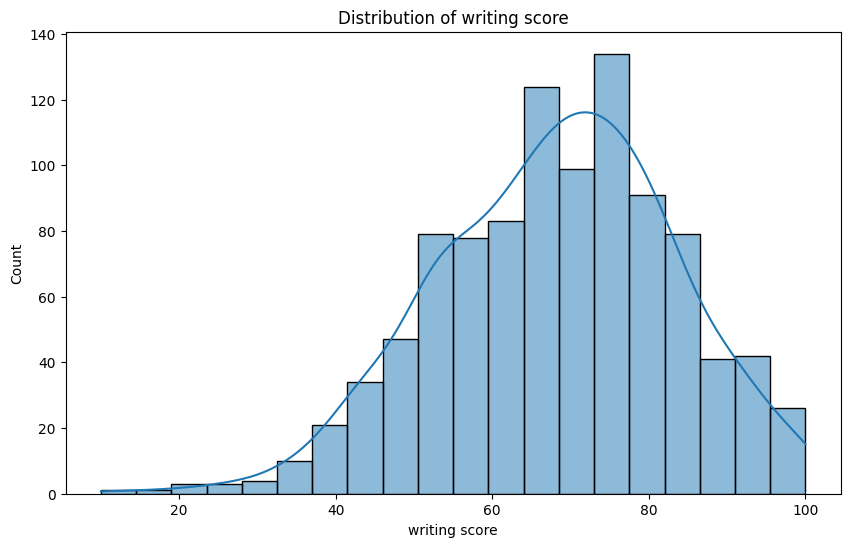

In [20]:
for col in ['math score','reading score','writing score']:
  plt.figure(figsize=(10,6))
  sns.histplot(df[col],kde = True,bins = 20)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)

Let us see how the test preparation course has effected the students performace


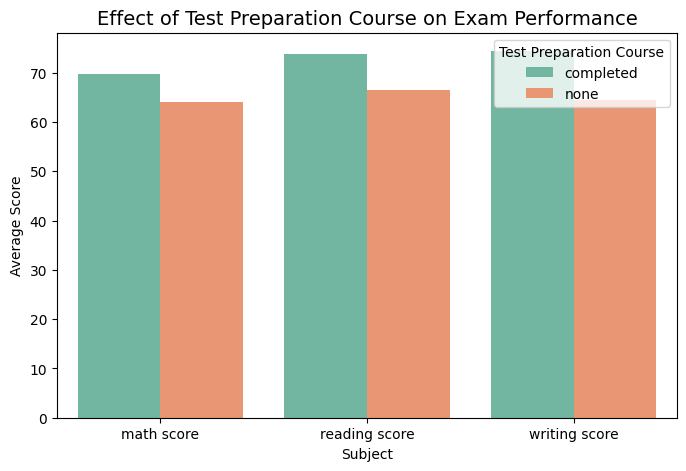

In [21]:
grouped = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean().reset_index()


melted = grouped.melt(id_vars="test preparation course", var_name="Subject", value_name="Average Score")


plt.figure(figsize=(8,5))
sns.barplot(data=melted, x="Subject", y="Average Score", hue="test preparation course", palette="Set2")
plt.title("Effect of Test Preparation Course on Exam Performance", fontsize=14)
plt.ylabel("Average Score")
plt.xlabel("Subject")
plt.legend(title="Test Preparation Course")
plt.show()

The relationship between scores:do students who read well can also write?

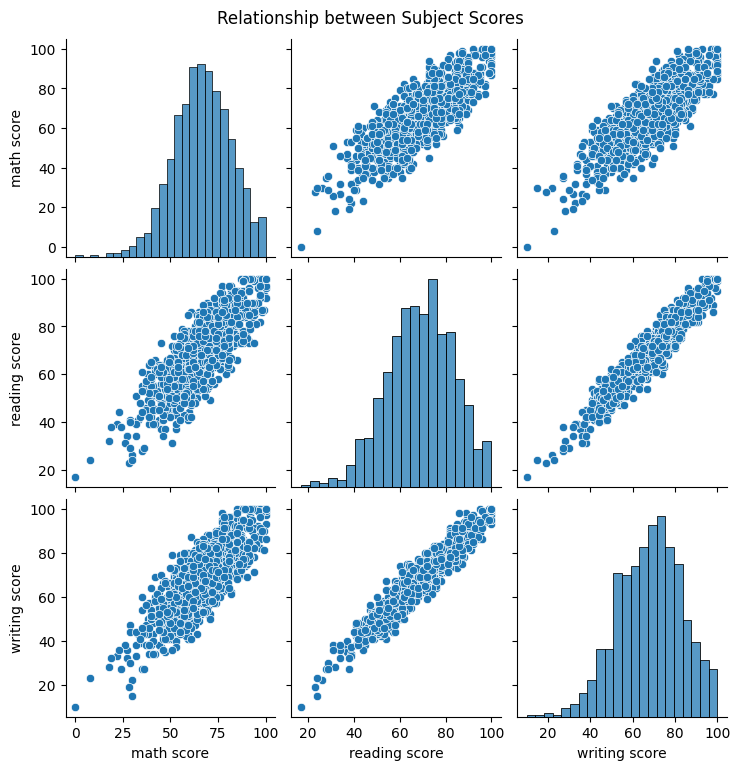

In [22]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle("Relationship between Subject Scores", y=1.02)
plt.show()


A plot that shows the maths results of students according to test preparation

/tmp/ipython-input-112183244.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='math score', data=df, palette='Set3')


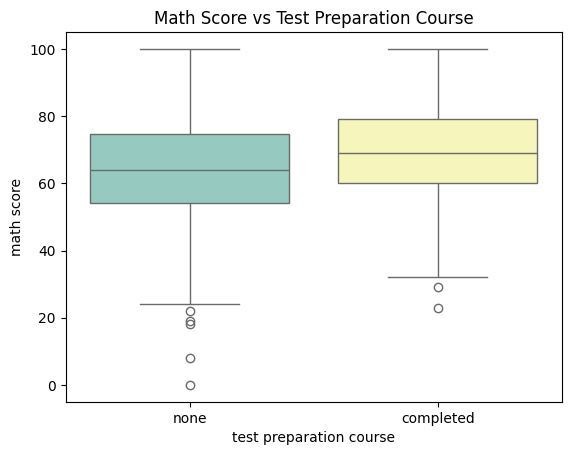

In [23]:
sns.boxplot(x='test preparation course', y='math score', data=df, palette='Set3')
plt.title('Math Score vs Test Preparation Course')
plt.show()

Training the model for the prediction of math score  of students using the LinearRegression model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
X = df[['gender', 'race/ethnicity', 'parental level of education',
        'lunch', 'test preparation course', 'reading score', 'writing score']]
y = df['math score']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numeric_features = ['reading score', 'writing score']

In [28]:
preprocessor = ColumnTransformer([('cat',OneHotEncoder(),categorical_features),('num',StandardScaler(),numeric_features)])

In [29]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [30]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'race/ethnicity',
                                                   'parental level of '
                                                   'education',
                                                   'lunch',
                                                   'test preparation course']),
                                                 ('num', StandardScaler(),
                                                  ['reading score',
                                                   'writing score'])])),
                ('regressor', LinearRegression())])

In [31]:
y_pred = model.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"r2 square is:{r2}")

Mean Absolute Error: 4.214763142474852
r2 square is:0.8804332983749563


Multiple Scores prediction

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

In [34]:
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df[['math score', 'reading score', 'writing score']]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)]
)


In [37]:
base_model = RandomForestRegressor(n_estimators=200, random_state=42)
multi_output_model = MultiOutputRegressor(base_model)


In [38]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', multi_output_model)
])




In [39]:
pipeline.fit(X_train, y_train)





Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'race/ethnicity',
                                                   'parental level of '
                                                   'education',
                                                   'lunch',
                                                   'test preparation '
                                                   'course'])])),
                ('regressor',
                 MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=200,
                                                                      random_state=42)))])

In [40]:
y_pred = pipeline.predict(X_test)

In [41]:
results = {}
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    results[subject] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}


print("📊 Multi-Output Regression Results:")
for subject, metrics in results.items():
    print(f"\n{subject}:")
    print(f"  Mean Absolute Error : {metrics['MAE']:.2f}")
    print(f"  Root Mean Squared Error : {metrics['RMSE']:.2f}")
    print(f"  R² Score: {metrics['R²']:.3f}")

📊 Multi-Output Regression Results:

math score:
  Mean Absolute Error : 12.46
  Root Mean Squared Error : 15.80
  R² Score: -0.026

reading score:
  Mean Absolute Error : 11.89
  Root Mean Squared Error : 15.21
  R² Score: -0.022

writing score:
  Mean Absolute Error : 11.23
  Root Mean Squared Error : 14.72
  R² Score: 0.101


These categorical features alone don’t contain enough predictive power to accurately determine numerical exam scores.
They only explain a small part of score variation — social/demographic factors — not the actual study performance.

So the model can’t learn meaningful relationships → resulting in low R² and high error.